# Plotting radials, quality control flags, and total vectors

In [48]:
from hfradarpy.radials import Radial, qc_radial_file
import glob
import os
import xarray as xr

Download the hfradarpy package from https://github.com/rucool/hfradarpy for access to examples and sample data. After downloading, update the following commands with the path to the data folder on your computer.

In [49]:
# Path to radial directory
radial_dir = '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/'
save_dir = '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials_qc/ruv/SEAB/'

# Use glob to find radial files (*
files = sorted(glob.glob(os.path.join(radial_dir, '*.ruv')))
files[:10]

['/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0000.ruv',
 '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0100.ruv',
 '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0200.ruv',
 '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0300.ruv',
 '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0400.ruv',
 '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0500.ruv',
 '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0600.ruv',
 '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0700.ruv',
 '/Users/teresa/Downloads/hfradarpy-master/examples/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0800.ruv',
 '/Users/teresa/Downloads/hfradarpy-master/exa

In [50]:
r = Radial(files[1])
r

<Radial: RDLi_SEAB_2019_01_01_0100.ruv>

In [51]:
# run high frequency radar qartod tests on open radial file

qc_values = dict(
    qc_qartod_avg_radial_bearing=dict(reference_bearing=151, warning_threshold=15, failure_threshold=30),
    qc_qartod_radial_count=dict(min_count=75.0, low_count=225.0),
    qc_qartod_maximum_velocity=dict(max_speed=300.0, high_speed=100.0),
    qc_qartod_spatial_median=dict(smed_range_cell_limit=2.1, smed_angular_limit=10, smed_current_difference=30),
    qc_qartod_temporal_gradient=dict(gradient_temp_fail=32, gradient_temp_warn=25),
    qc_qartod_primary_flag=dict(include=['qc_qartod_syntax', 'qc_qartod_valid_location', 'qc_qartod_radial_count',
                                         'qc_qartod_maximum_velocity', 'qc_qartod_spatial_median'])
)
r.initialize_qc()
r.qc_qartod_syntax()
r.qc_qartod_maximum_velocity(**qc_values['qc_qartod_maximum_velocity'])
r.qc_qartod_valid_location()
r.qc_qartod_radial_count(**qc_values['qc_qartod_radial_count'])
r.qc_qartod_spatial_median(**qc_values['qc_qartod_spatial_median'])
r.qc_qartod_temporal_gradient(files[1]) #pass the previous hourly radial to this one
r.qc_qartod_avg_radial_bearing(**qc_values['qc_qartod_avg_radial_bearing'])
r.qc_qartod_primary_flag(**qc_values['qc_qartod_primary_flag'])

/Users/teresa/miniconda3/envs/hfradarpy10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [52]:
tds = r.to_xarray('gridded', enhance=True).squeeze()
tds

<xarray.Dataset>
Dimensions:                    (bearing: 72, range: 22)
Coordinates:
  * bearing                    (bearing) int16 1 6 11 16 21 ... 341 346 351 356
  * range                      (range) float32 6.041 9.061 12.08 ... 66.45 69.47
    time                       datetime64[ns] 2019-01-01T01:00:00
    lon                        (range, bearing) float64 ...
    lat                        (range, bearing) float64 ...
Data variables: (12/22)
    u                          (range, bearing) float32 ...
    v                          (range, bearing) float32 ...
    vector_flag                (range, bearing) float32 ...
    spatial_quality            (range, bearing) float32 ...
    temporal_quality           (range, bearing) float32 ...
    velocity_max               (range, bearing) float32 ...
    ...                         ...
    valid_location_qc          (range, bearing) float32 ...
    radial_count_qc            (range, bearing) float32 ...
    spatial_median_filter_qc   (range, bearing) float32 ...
    temporal_gradient_qc       (range, bearing) float32 ...
    average_radial_bearing_qc  (range, bearing) float32 ...
    primary_flag_qc            (range, bearing) float32 ...
Attributes: (12/51)
    CTF:                           1.00
    FileType:                      LLUV rdls "RadialMap"
    LLUVSpec:                      1.27  2017 01 13
    UUID:                          DF43E143-E1F6-4CD2-9841-DE9503B48C37
    Manufacturer:                  CODAR Ocean Sensors. SeaSonde
    Site:                          SEAB ""
    ...                            ...
    PatternMethod:                 1 PatternVectors
    MergedCount:                   7
    ProcessedTimeStamp:            2019 01 01  01 41 16
    End:                           
    ProcessingTool:                ['"RadialMerger" 11.5.0', '"SpectraToRadia...
    QCTest:                        ['qc_qartod_syntax (Q201) - Test applies t...

In [53]:
save_file = save_dir + r.file_name[:-4:] + '.nc'
print('Saving NetCDF file: ' + save_file)
tds.to_netcdf(save_file)

Saving NetCDF file: /Users/teresa/Downloads/hfradarpy-master/examples/data/radials_qc/ruv/SEAB/RDLi_SEAB_2019_01_01_0100.nc


In [54]:
# Lets get rid of the single time dimension. It will cause problems during plotting
tds = tds.squeeze()

In [55]:
# Import matplotlib and cartopy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [56]:
# Adjust some standard plotting settings to make them the size of a sheet of paper
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

# Set colors of the land. 
edgecolor = 'black'
landcolor = 'tan'

LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='face',
    facecolor='tan'
)

state_lines = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)

extent = []

dx = dy = 0.2  # Area around the point of interest.

extent = [tds.lon.min()-dx, tds.lon.max()+dx, tds.lat.min()-dy, tds.lat.max()+dy]

In [57]:
print(extent)

[<xarray.DataArray 'lon' ()>
array(-74.9914)
Coordinates:
    time     datetime64[ns] 2019-01-01T01:00:00, <xarray.DataArray 'lon' ()>
array(-72.9559)
Coordinates:
    time     datetime64[ns] 2019-01-01T01:00:00, <xarray.DataArray 'lat' ()>
array(39.5413)
Coordinates:
    time     datetime64[ns] 2019-01-01T01:00:00, <xarray.DataArray 'lat' ()>
array(41.1923)
Coordinates:
    time     datetime64[ns] 2019-01-01T01:00:00]


In [58]:
# Create a re-usable function for map features that we can pass an axes to.
def map_features(ax):
    # Axes properties and features
    ax.set_extent(extent)
    ax.add_feature(LAND, edgecolor=edgecolor, facecolor=landcolor)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(state_lines, zorder=11, edgecolor=edgecolor)

    # Gridlines and grid labels
    gl = ax.gridlines(
        draw_labels=True,
        linewidth=.5,
        color='black',
        alpha=0.25,
        linestyle='--'
    )

    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.xlocator = mticker.MaxNLocator(integer=True)
    gl.ylocator = mticker.MaxNLocator(integer=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    ax.tick_params(which='major',
                   direction='out',
                   bottom=True, top=True,
                   labelbottom=True, labeltop=False,
                   left=True, right=True,
                   labelleft=True, labelright=False,
                   length=5, width=2)

    ax.tick_params(which='minor',
                   direction='out',
                   bottom=True, top=True,
                   labelbottom=True, labeltop=False,
                   left=True, right=True,
                   labelleft=True, labelright=False,
                   width=1)

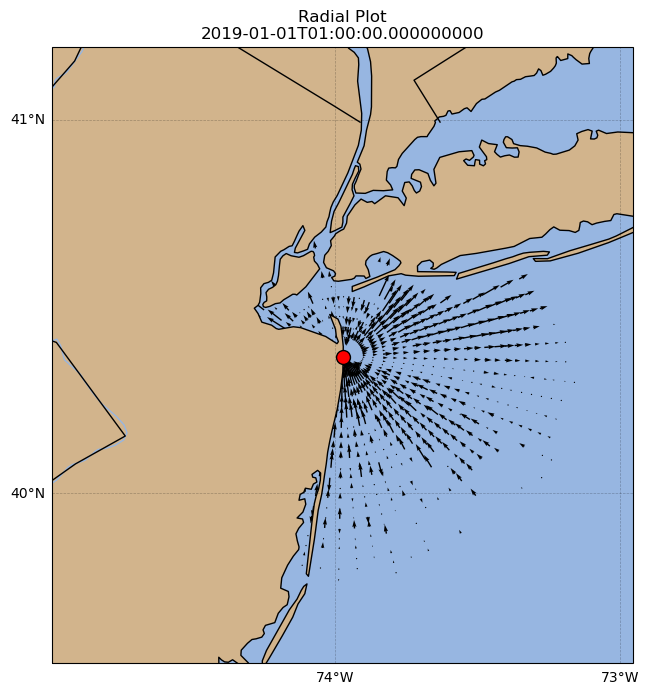

In [59]:
# Intialize an empty subplot using cartopy
fig, ax = plt.subplots(
    figsize=(11, 8),
    subplot_kw=dict(projection=ccrs.Mercator())
)

plt.title(f'Radial Plot\n{tds.time.data}')
plt.quiver(tds.lon.data, tds.lat.data, tds.u.data, tds.v.data, transform=ccrs.PlateCarree())

# Get the receiver location for plotting purposes
receiver_location = [float(x) for x in tds.Origin.split('  ')]
receiver_location.reverse()
receiver_location

plt.plot(receiver_location[0], receiver_location[1], 'o', markersize=10, markeredgecolor='black', color='red', transform=ccrs.PlateCarree())
map_features(ax)


# Split out everything into seperate variables in order to pass them easier to the plotting functions

In [60]:
import numpy.ma as ma

time = tds.time
lon = tds.coords['lon'].data
lat = tds.coords['lat'].data
u = tds['u'].data
v = tds['v'].data

u = ma.masked_invalid(u)
v = ma.masked_invalid(v)

The next step requires the oceans package.  If you don't have this package installed in the environment already, you will have to install it and then restart the kernel to run the next sections of code. 

In [61]:
from oceans.ocfis import uv2spdir, spdir2uv

angle, speed = uv2spdir(u, v)  # convert u/v to angle and speed

u, v = spdir2uv(  # convert angle and speed back to u/v, normalizing the arrow sizes
    np.ones_like(speed),
    angle,
    deg=True
)

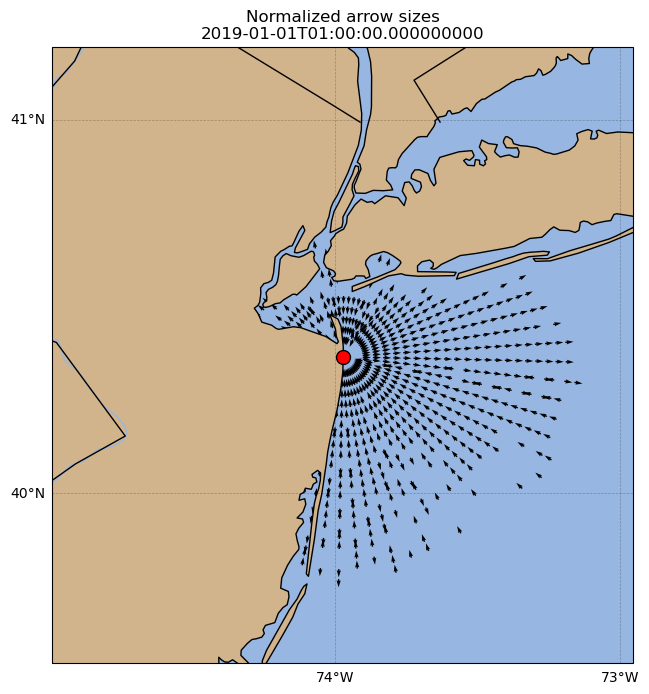

In [62]:
# Intialize an empty subplot using cartopy
fig, ax = plt.subplots(
    figsize=(11, 8),
    subplot_kw=dict(projection=ccrs.Mercator())
)

plt.title(f'Normalized arrow sizes\n{tds.time.data}')
plt.quiver(lon, lat, u, v, transform=ccrs.PlateCarree())
plt.plot(receiver_location[0], receiver_location[1], 'o', markersize=10, markeredgecolor='black', color='red', transform=ccrs.PlateCarree())

map_features(ax)

In [63]:
import cmocean
from matplotlib.colors import TwoSlopeNorm, Normalize

"""
Displays the direction and magnitude of the radials
"""
cmap = cmocean.cm.balance
scale=50
headwidth=2.5
headlength=4
headaxislength=4
sub=1
velocity_min = -40
velocity_max = 40
cbar_step = 10
offset = Normalize(vmin=velocity_min, vmax=velocity_max, clip=True)

In [64]:
# Define arrow colors. Limited by velocity_min and velocity_max
color_clipped = np.clip(
    tds.velocity.data[::sub],
    velocity_min,
    velocity_max
).squeeze()

ticks = np.append(np.arange(velocity_min, velocity_max, cbar_step), velocity_max)

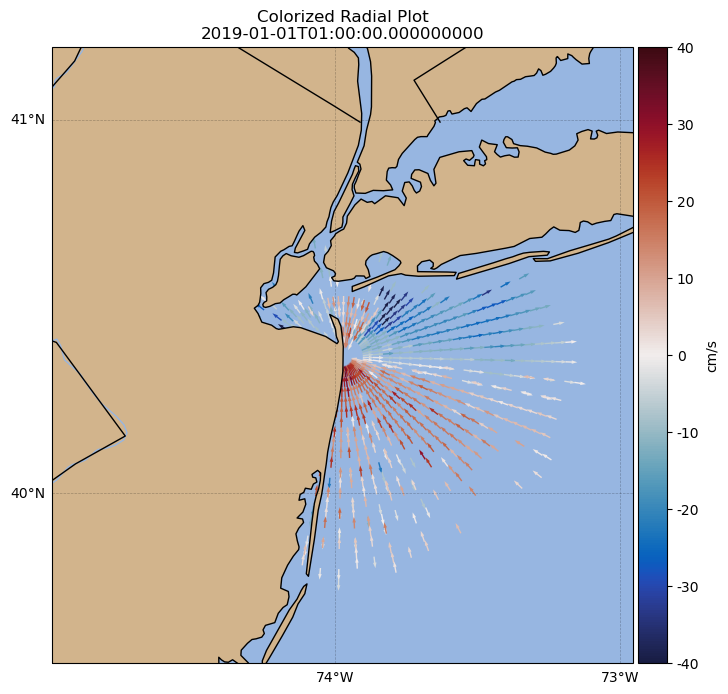

In [65]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(
        figsize=(11, 8),
        subplot_kw=dict(projection=ccrs.Mercator())
    )

# Plot title
plt.title(f'Colorized Radial Plot\n{tds.time.data}')

qargs = dict(cmap=cmap, scale=scale, headwidth=headwidth, headlength=headlength, headaxislength=headaxislength)
qargs['transform'] = ccrs.PlateCarree()
qargs['norm'] = offset

# plot arrows over pcolor
h = ax.quiver(
    lon[::sub],
    lat[::sub],
    u[::sub],
    v[::sub],
    color_clipped,
    **qargs
)
map_features(ax)

# generate colorbar
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size='5%', pad=0.05, axes_class=plt.Axes)
fig.add_axes(cax)

cb = plt.colorbar(h, cax=cax, ticks=ticks)
cb.ax.set_yticklabels([f'{s:d}' for s in ticks])
cb.set_label('cm/s')

In [66]:
from matplotlib import colors

"""
Motion displays the direction (towards or away) from radar
"""
title = 'Radial Map: Towards/Away from radar'
cmap= 'bwr'

velocity = tds.velocity
velocity_temp = velocity.where(velocity > 0, other=-1)  # Going away from radar
color_clipped = velocity_temp.where(velocity < 0, other=1).data  # Going towards radar
offset = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

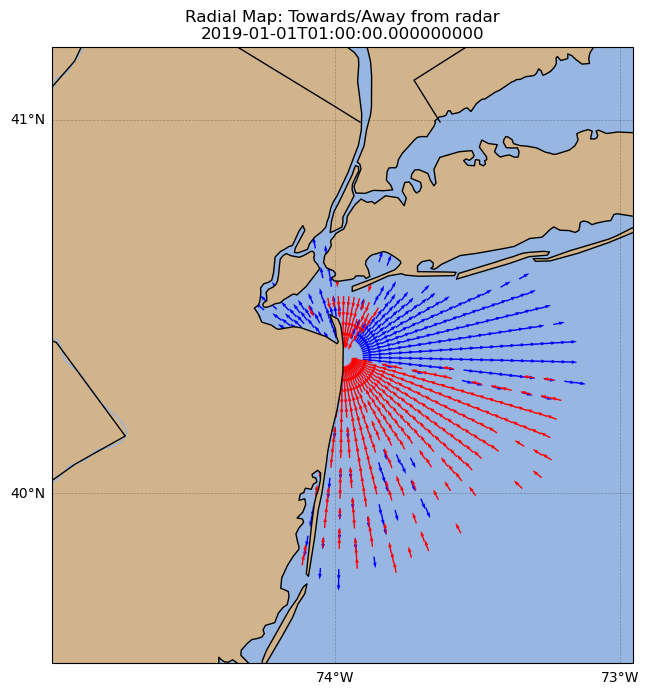

In [67]:
fig, ax = plt.subplots(
        figsize=(11, 8),
        subplot_kw=dict(projection=ccrs.Mercator())
    )

# Plot title
plt.title(f'{title}\n{tds.time.data}')

qargs = dict(cmap=cmap, scale=scale, headwidth=headwidth, headlength=headlength, headaxislength=headaxislength)
qargs['transform'] = ccrs.PlateCarree()
qargs['norm'] = offset

# plot arrows over pcolor
h = ax.quiver(
    lon[::sub],
    lat[::sub],
    u[::sub],
    v[::sub],
    color_clipped,
    **qargs
)
map_features(ax)


In [68]:
color_clipped = tds.primary_flag_qc.where(tds.primary_flag_qc == 1, other=-1).data  # PRIM == 1 where vectors pass qc
offset = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
title = "Radial Map: QC Pass/Fail"
cmap = colors.ListedColormap(['red', 'limegreen'])

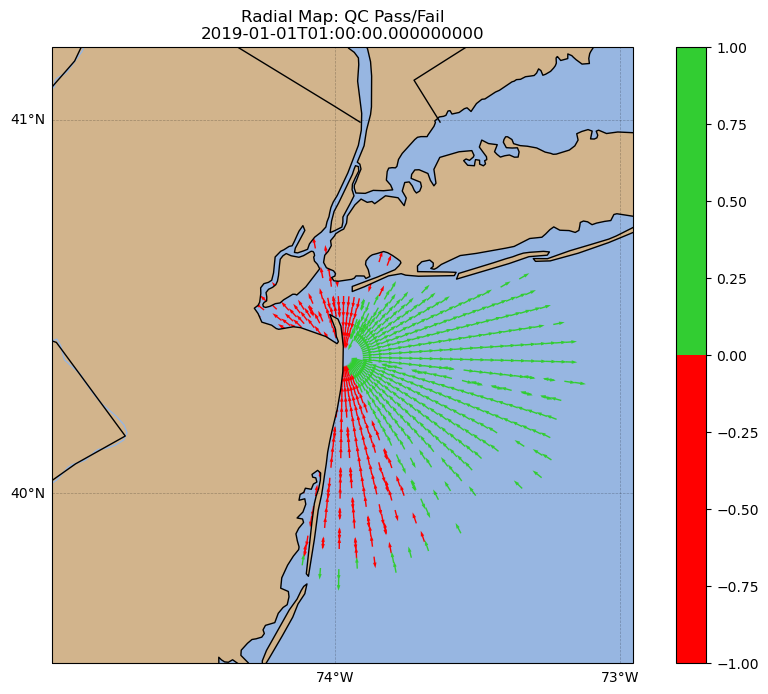

In [69]:
fig, ax = plt.subplots(
        figsize=(11, 8),
        subplot_kw=dict(projection=ccrs.Mercator())
    )

# Plot title
plt.title(f'{title}\n{tds.time.data}')


qargs = dict(cmap=cmap, scale=scale, headwidth=headwidth, headlength=headlength, headaxislength=headaxislength)
qargs['transform'] = ccrs.PlateCarree()
qargs['norm'] = offset

# plot arrows over pcolor
h = ax.quiver(
    lon[::sub],
    lat[::sub],
    u[::sub],
    v[::sub],
    color_clipped,
    **qargs
)
map_features(ax)
plt.colorbar(h)


# Plot the totals

In [70]:
total_file = '/Users/teresa/Downloads/hfradarpy-master/examples/data/totals/maracoos_6km/hfr_rtv_midatl_6km_oi_maracoos_2022_02_21_1200.nc'

ds = xr.open_dataset(total_file)
ds

<xarray.Dataset>
Dimensions:                (time: 1, z: 1, lat: 187, lon: 196)
Coordinates:
  * lon                    (lon) float32 -77.91 -77.85 -77.79 ... -66.64 -66.58
  * lat                    (lat) float32 33.82 33.87 33.93 ... 43.74 43.8 43.85
  * z                      (z) float32 0.0
  * time                   (time) datetime64[ns] 2022-02-21T12:00:00
Data variables: (12/17)
    u                      (time, z, lat, lon) float32 ...
    v                      (time, z, lat, lon) float32 ...
    u_err                  (time, z, lat, lon) float32 ...
    v_err                  (time, z, lat, lon) float32 ...
    total_errors           (time, z, lat, lon) float32 ...
    uv_covariance          (time, z, lat, lon) float32 ...
    ...                     ...
    qc_primary_flag        (time, z, lat, lon) float32 ...
    qc_operator_flag       (time, z, lat, lon) float32 ...
    crs                    int8 ...
    instrument             int8 ...
    radial_metadata        int8 ...
    processing_parameters  int8 ...
Attributes: (12/47)
    ncei_template_version:         NCEI_NetCDF_Grid_Template_v2.0
    publisher_name:                NOAA National Centers for Environmental In...
    publisher_email:               ncei.info@noaa.gov
    publisher_url:                 www.ncei.noaa.gov
    title:                         MARACOOS 6km Sea Surface Currents
    summary:                       Optimally Interpolated Total Vectors calcu...
    ...                            ...
    platform:                      MARACOOS HF Radar 5MHz Network
    instrument:                    Network includes CODAR sites AMAG, ASSA, B...
    cdm_data_type:                 Grid
    references:                    DOI:10.1029/2007JC004244 DOI:10.1007/s1023...
    method:                        Optimal Interpolation
    MARACOOS_processing_version:   maracoos_v01

In [71]:
lon = ds.lon.data
lat = ds.lat.data
u = ds.u.data
v = ds.v.data
lon.shape, lat.shape, u.shape, v.shape

((196,), (187,), (1, 1, 187, 196), (1, 1, 187, 196))

In [72]:
lons, lats = np.meshgrid(lon, lat)
lons.shape, lats.shape, u.shape, v.shape

((187, 196), (187, 196), (1, 1, 187, 196), (1, 1, 187, 196))

In [73]:
from oceans.ocfis import uv2spdir, spdir2uv

angle, speed = uv2spdir(u.squeeze(), v.squeeze())  # convert u/v to angle and speed
u, v = spdir2uv(  # convert angle and speed back to u/v, normalizing the arrow sizes
    np.ones_like(speed),
    angle,
    deg=True
)

In [74]:
np.nanmin(speed), np.nanmax(speed)

(0.0, 1.8515129)

In [75]:
extent = [-76.2, -69, 33.5, 42]

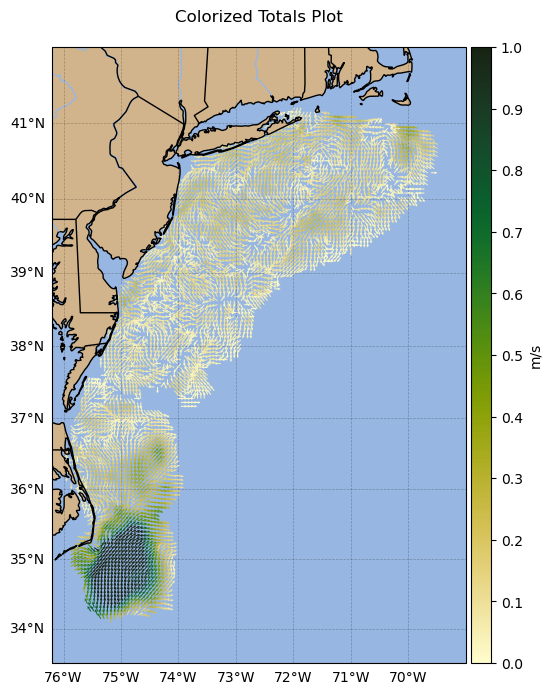

In [76]:
import cmocean

qwargs = dict(
    cmap=cmocean.cm.speed,
    transform=ccrs.PlateCarree(),
    scale=65, # Number of data units per arrow length unit, e.g., m/s per plot width; a smaller scale parameter makes the arrow longer. Default is None.
    headwidth=2.75, # Head width as multiple of shaft width.
    headlength=2.75, #Head length as multiple of shaft width.
    headaxislength=2.5, # Head length at shaft intersection.
    minshaft=1,
    minlength=1
)

# Clip the colors 
color_clipped = np.clip(speed, 0, 1).squeeze()

# Set the colorbar ticks to correspond to the velocity minimum and maximum of the data with a step of 20... Append the max velocity 
ticks = np.append(np.arange(0, 1, .1), 1)

fig, ax = plt.subplots(
        figsize=(11, 8),
        subplot_kw=dict(projection=ccrs.Mercator())
    )

# Plot title
plt.title(f'Colorized Totals Plot\n')

# plot arrows over pcolor
h = ax.quiver(
    lons,
    lats,
    u,
    v,
    color_clipped,
    **qwargs
)
map_features(ax)
ax.set_extent(extent)

# generate colorbar
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size='5%', pad=0.05, axes_class=plt.Axes)
fig.add_axes(cax)

cb = plt.colorbar(h, cax=cax, ticks=ticks)
# cb.ax.set_yticklabels([f'{s:d}' for s in ticks])
cb.set_label('m/s')